In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import os
import re
from scipy.optimize import curve_fit
%matplotlib inline

katalog_z_danymi = "pliki"

In [2]:
rc('font', family='Comic Sans MS')
filenames = os.listdir(katalog_z_danymi)
paths = [os.path.join(katalog_z_danymi, filename) for filename in filenames] # powinno też działać na windowsie
T_values = [int(re.findall(r"Kappa(.*).csv", filename)[0]) for filename in filenames]
all_data = [np.loadtxt(path) for path in paths]
M = 4.81e-26
k = 1.3806e-23
kT = k * (273.15 + 26)

In [3]:
delta_temp = np.sqrt(5/3)
delta_T = np.sqrt(125/3)
dWezelek = np.sqrt(5/12)

4.3525e-02 | 1.4136e-04 | 8.000e+03 hz | 1.4120 | 7.6290e-03
4.6381e-02 | 1.5920e-04 | 7.692e+03 hz | 1.4824 | 8.1767e-03
4.9644e-02 | 9.3813e-05 | 7.143e+03 hz | 1.4644 | 6.9021e-03
5.3507e-02 | 8.3696e-05 | 6.667e+03 hz | 1.4819 | 6.8055e-03
5.7853e-02 | 1.4834e-04 | 6.250e+03 hz | 1.5226 | 7.6462e-03
6.3289e-02 | 2.5323e-04 | 5.263e+03 hz | 1.2922 | 7.6068e-03
6.8968e-02 | 2.8686e-04 | 5.000e+03 hz | 1.3849 | 8.3028e-03
7.6538e-02 | 4.9341e-05 | 4.762e+03 hz | 1.5471 | 6.7538e-03
8.3769e-02 | 8.0344e-05 | 4.000e+03 hz | 1.3076 | 5.7835e-03


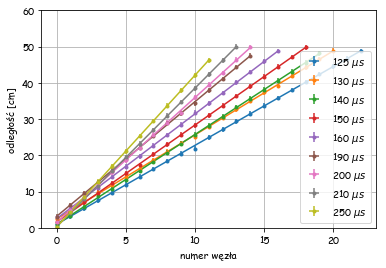

In [4]:
# średnia liczona z wagami 1/niepewnosc
licznik = 0
mianownik = 0
with open("tabelka.tex", "w") as file:
    dataframe = pd.DataFrame(columns=["k", "M", "T", "$\Delta$T", "f", "$\Delta$f", "$\lambda$", "$\Delta\lambda$", "$\Delta\kappa$", "d$\kappa$"])
    dataframe_pomiary = pd.DataFrame(columns=range(len(T_values)))
    for indeks, T, data in zip(range(len(T_values)), T_values, all_data):
        x = np.arange(data.size)
        kolor = "C" + str(indeks)
        plt.errorbar(x,data,dWezelek,0,'.', color=kolor, label=f"{T} $\mu s$")
        fit, covs = np.polyfit(x, data, 1, cov = True)
        plt.plot(x, np.polyval(fit, x), color=kolor)
        a = fit[0]
        da = covs[0,0]**0.5
        Lambda, dLambda = 2e-2*a, 2e-2*da
        f = 1/(T * 1e-6)
        kappa = (Lambda * f)**2 * M/kT
        df = delta_T/T**2
        dkappa=np.sqrt((df*kappa/f)**2+(delta_temp*kappa/299)**2+(dLambda*kappa/Lambda)**2)
        print("{:.4e} | {:.4e} | {:.3e} hz | {:.4f} | {:.4e}".format(Lambda,dLambda,f,kappa,dkappa))
        licznik += kappa/dkappa
        mianownik += 1/dkappa
        dataframe.loc[indeks] = (k, M, T, delta_temp, f, df, Lambda, dLambda, kappa, dkappa)
    file.write(dataframe.to_latex())
plt.legend()
plt.ylabel("odległość [cm]")
plt.xlabel("numer węzła")
plt.ylim(0,60)
plt.grid()
plt.savefig("Kappa.png")

In [5]:
print(licznik/mianownik)

1.43113762954


In [10]:
dataframe_pomiary = pd.DataFrame(columns=range(len(T_values)))
for indeks, T, data in zip(range(len(T_values)), T_values, all_data):
    print(indeks,len(data))
    dataframe_pomiary[indeks]=data
print(dataframe_pomiary)

0 23
1 21


ValueError: Length of values does not match length of index